# EDA - Telecom Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
data = Path('data/cleaned_data.csv')

In [3]:
df = pd.read_csv(data)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
df.shape

(7032, 21)

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df.nunique(axis=0)

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


This indicates we are dealing mostly with the categorical variables and <code>SeniorCitizen</code> should not be a numerical column.

In [11]:
df.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [12]:
df.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df_cleaned = df.copy()

In [27]:
df_cleaned.SeniorCitizen = df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')

In [28]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df_cleaned.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [31]:
df_cleaned.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


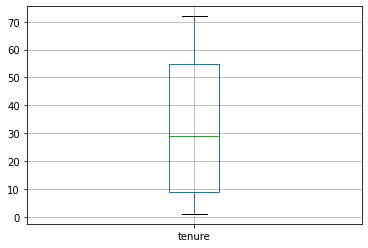

In [39]:
df_cleaned.boxplot(['tenure'])

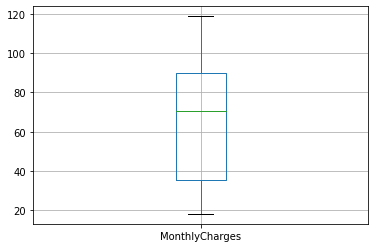

In [40]:
df_cleaned.boxplot(['MonthlyCharges'])

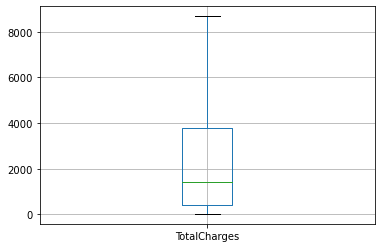

In [41]:
df_cleaned.boxplot(['TotalCharges'])

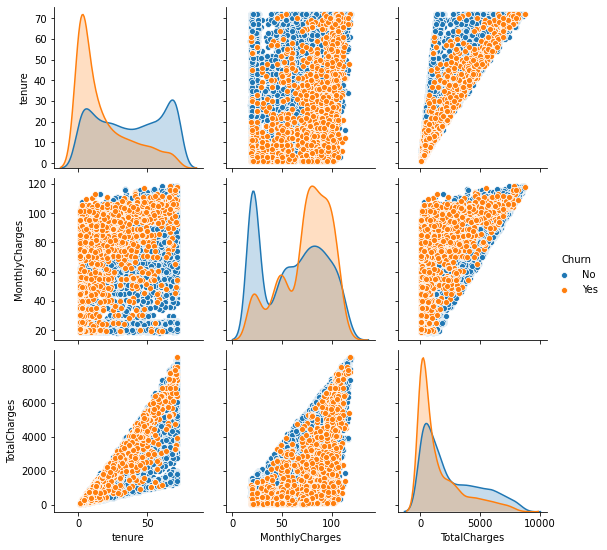

In [43]:
sns.pairplot(df_cleaned, hue = 'Churn')

In [45]:
plt.figure(figsize=(15,8))
corr = df_cleaned.drop(['Churn'], axis=1).corr().abs()
corr.round(2).style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.250000,0.830000
MonthlyCharges,0.250000,1.000000,0.650000
TotalCharges,0.830000,0.650000,1.000000


<Figure size 1080x576 with 0 Axes>

In [49]:
df2 = df_cleaned.copy().drop('customerID', axis =1)

### Lets explore the demographics & distribution of categorical data

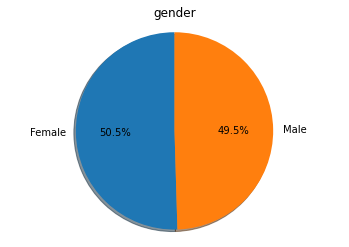

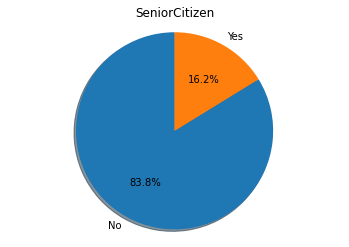

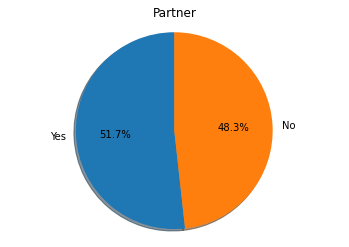

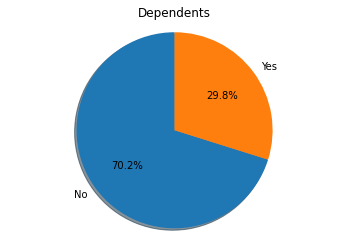

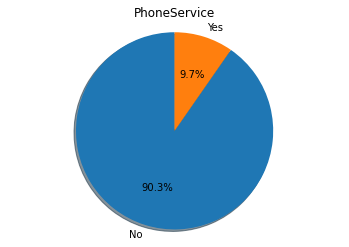

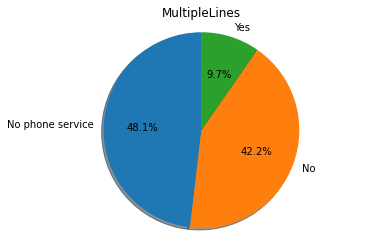

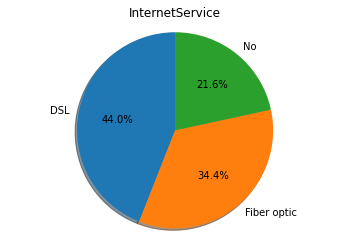

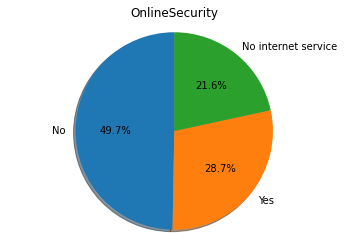

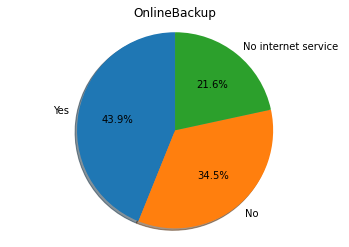

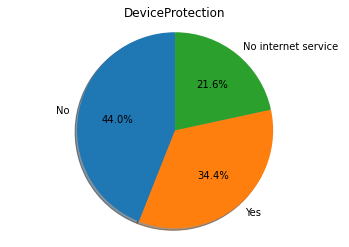

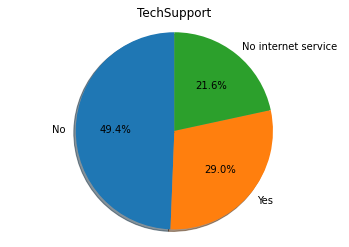

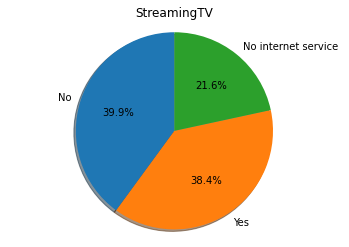

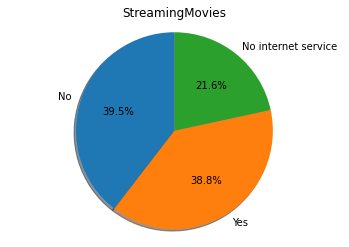

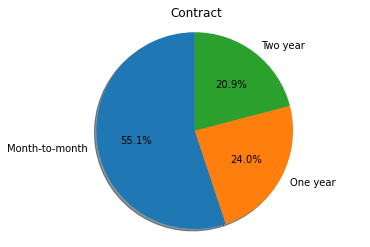

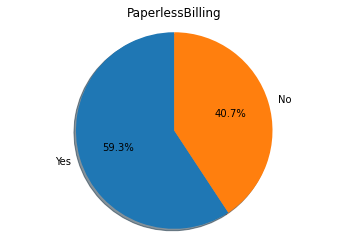

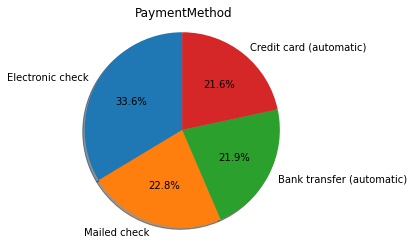

In [66]:
for col in df2.drop(['Churn'], axis=1):
    if df2.dtypes[col] == np.object:
        #print(col," : ",df[col].unique())
        mlabels = df2[col].unique()
        values = df2[col].value_counts()
        plt.pie(values, labels=mlabels, autopct='%1.1f%%', startangle=90, shadow = True)
        plt.title(col)
        plt.axis('equal')
        plt.show()

In [50]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [51]:
df_dummies = pd.get_dummies(df2, drop_first=True)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [52]:
plt.figure(figsize=(15,8))
corr = df_dummies.drop(['Churn'], axis=1).corr().abs()
corr.round(2).style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.250000,0.830000,0.010000,0.020000,0.380000,0.160000,0.010000,0.010000,0.330000,0.020000,0.040000,0.040000,0.330000,0.040000,0.360000,0.040000,0.360000,0.040000,0.330000,0.040000,0.280000,0.040000,0.290000,0.200000,0.560000,0.000000,0.230000,0.210000,0.230000
MonthlyCharges,0.250000,1.000000,0.650000,0.010000,0.220000,0.100000,0.110000,0.250000,0.250000,0.490000,0.790000,0.760000,0.760000,0.300000,0.760000,0.440000,0.760000,0.480000,0.760000,0.340000,0.760000,0.630000,0.760000,0.630000,0.000000,0.070000,0.350000,0.030000,0.270000,0.380000
TotalCharges,0.830000,0.650000,1.000000,0.000000,0.100000,0.320000,0.060000,0.110000,0.110000,0.470000,0.360000,0.370000,0.370000,0.410000,0.370000,0.510000,0.370000,0.520000,0.370000,0.430000,0.370000,0.520000,0.370000,0.520000,0.170000,0.360000,0.160000,0.180000,0.060000,0.290000
gender_Male,0.010000,0.010000,0.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.020000,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.010000
SeniorCitizen_Yes,0.020000,0.220000,0.100000,0.000000,1.000000,0.020000,0.210000,0.010000,0.010000,0.140000,0.250000,0.180000,0.180000,0.040000,0.180000,0.070000,0.180000,0.060000,0.180000,0.060000,0.180000,0.110000,0.180000,0.120000,0.050000,0.120000,0.160000,0.020000,0.170000,0.150000
Partner_Yes,0.380000,0.100000,0.320000,0.000000,0.020000,1.000000,0.450000,0.020000,0.020000,0.140000,0.000000,0.000000,0.000000,0.140000,0.000000,0.140000,0.000000,0.150000,0.000000,0.120000,0.000000,0.120000,0.000000,0.120000,0.080000,0.250000,0.010000,0.080000,0.080000,0.100000
Dependents_Yes,0.160000,0.110000,0.060000,0.010000,0.210000,0.450000,1.000000,0.000000,0.000000,0.020000,0.160000,0.140000,0.140000,0.080000,0.140000,0.020000,0.140000,0.010000,0.140000,0.060000,0.140000,0.020000,0.140000,0.040000,0.070000,0.200000,0.110000,0.060000,0.150000,0.060000
PhoneService_Yes,0.010000,0.250000,0.110000,0.010000,0.010000,0.020000,0.000000,1.000000,1.000000,0.280000,0.290000,0.170000,0.170000,0.090000,0.170000,0.050000,0.170000,0.070000,0.170000,0.100000,0.170000,0.020000,0.170000,0.030000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000
MultipleLines_No phone service,0.010000,0.250000,0.110000,0.010000,0.010000,0.020000,0.000000,1.000000,1.000000,0.280000,0.290000,0.170000,0.170000,0.090000,0.170000,0.050000,0.170000,0.070000,0.170000,0.100000,0.170000,0.020000,0.170000,0.030000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000
MultipleLines_Yes,0.330000,0.490000,0.470000,0.010000,0.140000,0.140000,0.020000,0.280000,0.280000,1.000000,0.370000,0.210000,0.210000,0.100000,0.210000,0.200000,0.210000,0.200000,0.210000,0.100000,0.210000,0.260000,0.210000,0.260000,0.000000,0.110000,0.160000,0.060000,0.080000,0.230000


<Figure size 1080x576 with 0 Axes>

In [59]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [60]:
to_drop

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [61]:
print('Reduced dataframe size ',df_dummies.drop(df_dummies[to_drop], axis=1).shape)

KeyError: "None of [Index(['MultipleLines_No phone service', 'OnlineSecurity_No internet service',\n       'OnlineBackup_No internet service',\n       'DeviceProtection_No internet service',\n       'TechSupport_No internet service', 'StreamingTV_No internet service',\n       'StreamingMovies_No internet service'],\n      dtype='object')] are in the [columns]"

In [62]:
corr = df_dummies.drop(['Churn'], axis=1).corr().abs()
corr.round(2).style.background_gradient(cmap='coolwarm')

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.250000,0.830000,0.010000,0.020000,0.380000,0.160000,0.010000,0.330000,0.020000,0.040000,0.330000,0.360000,0.360000,0.330000,0.280000,0.290000,0.200000,0.560000,0.000000,0.230000,0.210000,0.230000
MonthlyCharges,0.250000,1.000000,0.650000,0.010000,0.220000,0.100000,0.110000,0.250000,0.490000,0.790000,0.760000,0.300000,0.440000,0.480000,0.340000,0.630000,0.630000,0.000000,0.070000,0.350000,0.030000,0.270000,0.380000
TotalCharges,0.830000,0.650000,1.000000,0.000000,0.100000,0.320000,0.060000,0.110000,0.470000,0.360000,0.370000,0.410000,0.510000,0.520000,0.430000,0.520000,0.520000,0.170000,0.360000,0.160000,0.180000,0.060000,0.290000
gender_Male,0.010000,0.010000,0.000000,1.000000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.020000,0.010000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.000000,0.010000
SeniorCitizen_Yes,0.020000,0.220000,0.100000,0.000000,1.000000,0.020000,0.210000,0.010000,0.140000,0.250000,0.180000,0.040000,0.070000,0.060000,0.060000,0.110000,0.120000,0.050000,0.120000,0.160000,0.020000,0.170000,0.150000
Partner_Yes,0.380000,0.100000,0.320000,0.000000,0.020000,1.000000,0.450000,0.020000,0.140000,0.000000,0.000000,0.140000,0.140000,0.150000,0.120000,0.120000,0.120000,0.080000,0.250000,0.010000,0.080000,0.080000,0.100000
Dependents_Yes,0.160000,0.110000,0.060000,0.010000,0.210000,0.450000,1.000000,0.000000,0.020000,0.160000,0.140000,0.080000,0.020000,0.010000,0.060000,0.020000,0.040000,0.070000,0.200000,0.110000,0.060000,0.150000,0.060000
PhoneService_Yes,0.010000,0.250000,0.110000,0.010000,0.010000,0.020000,0.000000,1.000000,0.280000,0.290000,0.170000,0.090000,0.050000,0.070000,0.100000,0.020000,0.030000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000
MultipleLines_Yes,0.330000,0.490000,0.470000,0.010000,0.140000,0.140000,0.020000,0.280000,1.000000,0.370000,0.210000,0.100000,0.200000,0.200000,0.100000,0.260000,0.260000,0.000000,0.110000,0.160000,0.060000,0.080000,0.230000
InternetService_Fiber optic,0.020000,0.790000,0.360000,0.010000,0.250000,0.000000,0.160000,0.290000,0.370000,1.000000,0.470000,0.030000,0.170000,0.180000,0.020000,0.330000,0.320000,0.080000,0.210000,0.330000,0.050000,0.340000,0.310000


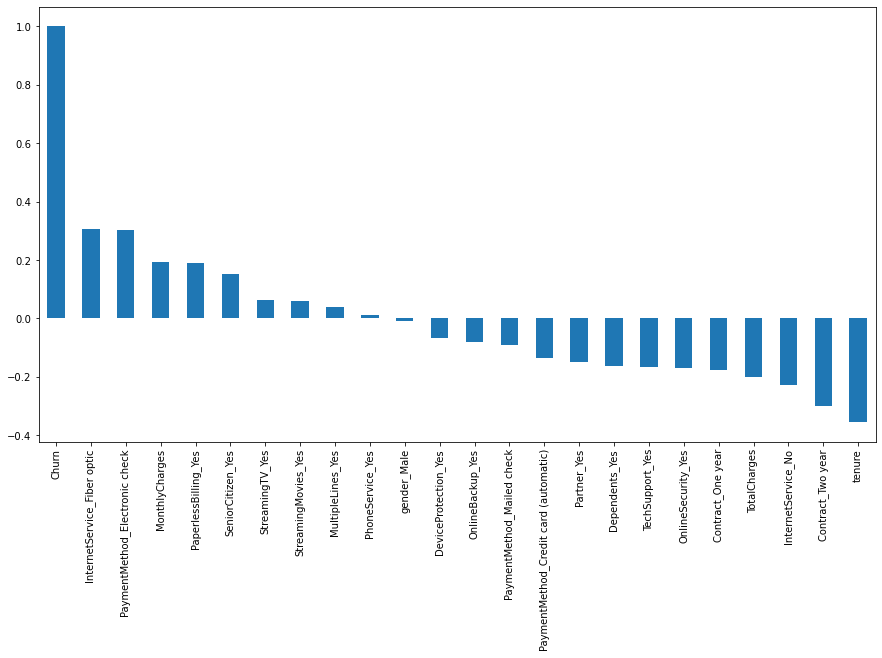

In [63]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')